In [3]:
ner_tag

8

Остальное
С.А.


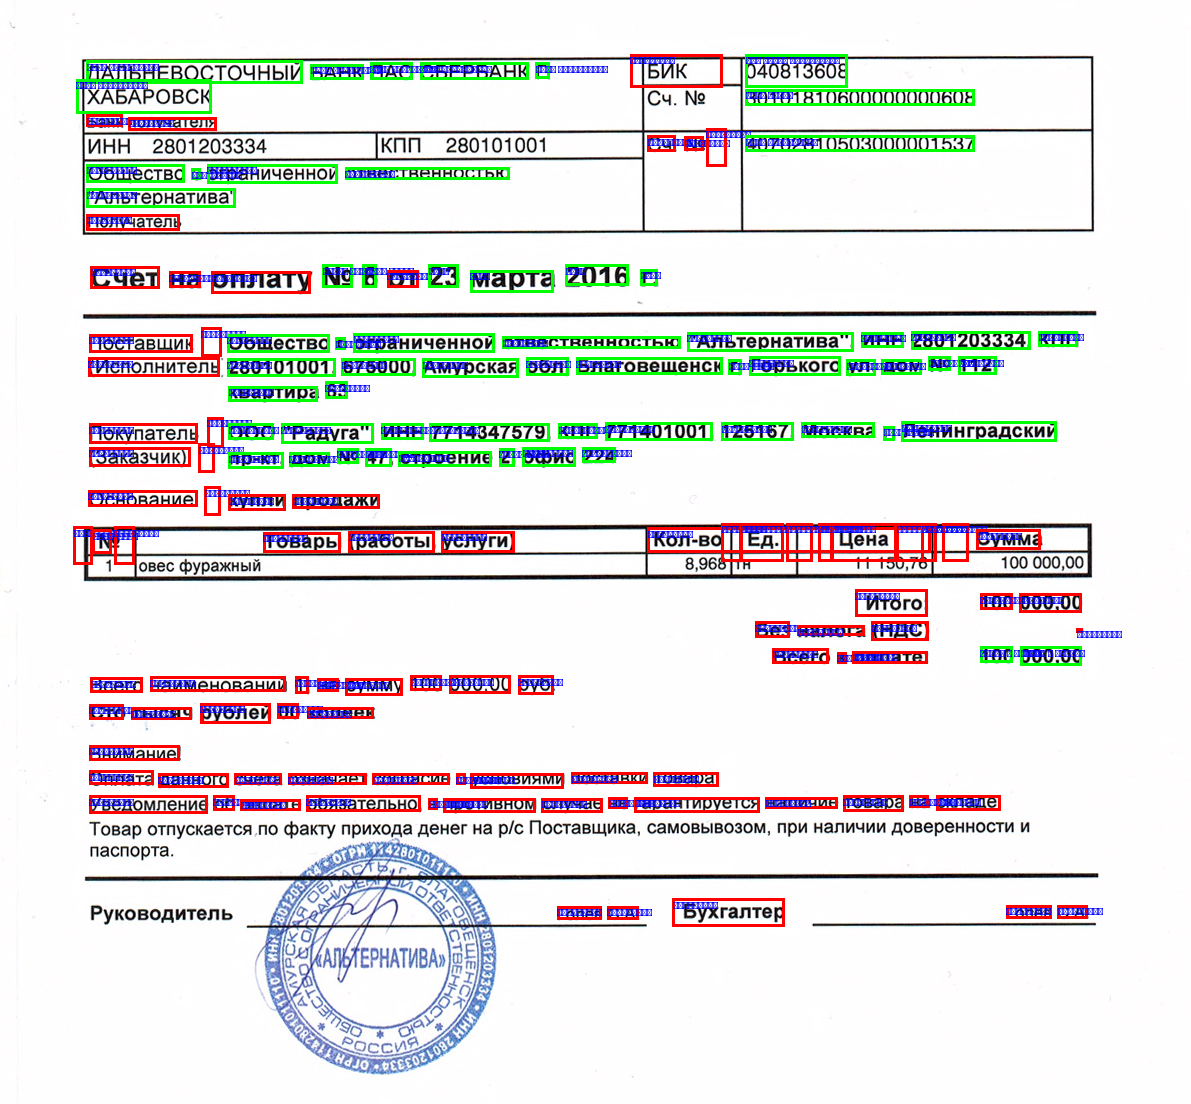

In [12]:
from PIL import ImageDraw, Image, ImageFont
from datasets import load_dataset

# labels = ['issued', 'issued_date', 'code', 'number', 'lastname', 'firstname',
                                   #'middlename', 'gender', 'bday', 'place', 'other']

labels = ['Банк получателя', 'Получатель', 'БИК банка получателя', 'Счет банка', 'Счет получателя', 'Всего к оплате', 'Поставщик', 'Покупатель', 'Остальное', 'Номер счета', 'Дата', 'ИНН получателя', 'КПП получателя']


id2label = {v: k for v, k in enumerate(labels)}
label2id = {k: v for v, k in enumerate(labels)}
dataset = load_dataset('datasets/invoices_limited_55/funsd.py')

i = 0
image_path = dataset['train'][i]['image_path']
img = Image.open(image_path)
d = ImageDraw.Draw(img)


def unnormalize_bbox(bbox, width, height):
    """Returns unnormalized bbox [x_0, y_0, x_1, y_1] format."""
    x_0 = bbox[0] / 1000 * width
    y_0 = bbox[1] / 1000 * height
    x_1 = bbox[2] / 1000 * width
    y_1 = bbox[3] / 1000 * height
    return [x_0, y_0, x_1, y_1]

words, boxes = [], []
for idx in range(len(dataset['train'][i]['words'])):
    word = dataset['train'][i]['words'][idx]
    bbox = dataset['train'][i]['bboxes'][idx]
    ner_tag = dataset['train'][i]['ner_tags'][idx]
    bbox = unnormalize_bbox(bbox, img.size[0], img.size[1])

    words.append(word)
    boxes.append(bbox)

    if id2label[ner_tag] == 'Остальное':
        color = (255, 0, 0)
    else:
        color = (0, 255, 0)
    d.rectangle(bbox, outline=color, width=3)
    d.text((bbox[0], bbox[1]), id2label[ner_tag], (0, 0, 255))
    

print(id2label[ner_tag])
print(word)
img

In [8]:
words

['[ДАЛЬНЕВОСТОЧНЫЙ',
 'БАНК',
 'ПАО',
 'СБЕРБАНК',
 'Г.',
 '[БИК___—',
 '040813608',
 'ХАБАРОВСК',
 '30101810600000000608',
 '|Банк',
 'получателя',
 'Сч.',
 '№',
 '—',
 '140702810503000001537',
 'Общество',
 'с',
 'ограниченной',
 'отвественностью',
 '"Альтернатива"',
 'Получатель',
 'Счет',
 'на',
 'оплату',
 '№',
 '6',
 'от',
 '23',
 'марта',
 '2016',
 'г.',
 'Поставщик',
 '—',
 'Общество',
 'с',
 'ограниченной',
 'отвественностью',
 '"Альтернатива",',
 'ИНН',
 '2801203334,',
 'КПП',
 '(Исполнитель',
 '280101001,',
 '675000,',
 'Амурская',
 'обл,',
 'Благовещенск',
 'г,',
 'Горького',
 'ул,',
 'дом',
 '№',
 '112,',
 'квартира',
 '63',
 'Покупатель',
 '—',
 'ООО',
 '"Радуга",',
 'ИНН',
 '7714347579,',
 'КПП',
 '771401001,',
 '125167,',
 'Москва',
 'г,',
 'Ленинградский',
 '(Заказчик):',
 '—',
 'пр-кт,',
 'дом',
 '№',
 '47,',
 'строение',
 '2,',
 'офис',
 '224',
 'Основание:',
 '—',
 'купли',
 'продажи',
 '|',
 '№',
 '|',
 'Товары',
 '(работы,',
 'услуги),',
 '[Кол-во',
 '[',
 'Ед.',


In [9]:
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2TokenizerFast, LayoutLMv2Processor
tokenizer = LayoutLMv2TokenizerFast.from_pretrained("microsoft/layoutlmv2-base-uncased")

In [14]:
tokenizer(words, boxes = boxes).keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'bbox'])